# Análise do novo coronavírus e casos da COVID-19 no Brasil
## Os dados usados abaixo são de um dadaset disponível no [kaggle](https://www.kaggle.com/unanimad/corona-virus-brazil) e baixado no dia de 27/03

#### Código padrão

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas_profiling as pp

In [3]:
# !kaggle datasets download -d sudalairajkumar/novel-corona-virus-2019-dataset

#### Dataset

In [59]:
covid_BR_19 = pd.read_csv(r'C:\Users\mateu\OneDrive\Documentos\Programação\dados\brazil_covid19_27_03.csv')
covid_BR_19 = covid_BR_19.drop(columns=['hour']).copy()
covid_BR_19.head()

,date,state,suspects,refuses,cases,deaths
0,2020-01-30,Minas Gerais,1,0,0,0
1,2020-01-30,Rio de Janeiro,1,0,0,0
2,2020-01-30,Santa Catarina,0,2,0,0
3,2020-01-30,São Paulo,3,1,0,0
4,2020-01-30,Rio Grande do Sul,2,2,0,0


### A primeira análise será feita dia a dia para a cidade do Rio de Janeiro

#### code

In [62]:
corona_data = covid_BR_19.groupby(['date', 'state'], sort=True).sum()
corona_data.head(10) #.shape

suspects  refuses  cases  deaths
date       state                                              
2020-01-30 Ceará                     1        0      0       0
           Minas Gerais              1        0      0       0
           Paraná                    1        1      0       0
           Rio Grande do Sul         2        2      0       0
           Rio de Janeiro            1        0      0       0
           Santa Catarina            0        2      0       0
           São Paulo                 3        1      0       0
2020-01-31 Ceará                     1        0      0       0
           Minas Gerais              1        0      0       0
           Paraná                    1        1      0       0

In [67]:
corona_RJ = covid_BR_19.loc[(covid_BR_19.state=='Rio de Janeiro')]
corona_RJ.head()

,date,state,suspects,refuses,cases,deaths
1,2020-01-30,Rio de Janeiro,1,0,0,0
9,2020-01-31,Rio de Janeiro,0,1,0,0
16,2020-02-01,Rio de Janeiro,0,1,0,0
23,2020-02-02,Rio de Janeiro,0,1,0,0
30,2020-02-03,Rio de Janeiro,1,1,0,0


#### Número de casos

In [132]:
corona_RJ = corona_RJ.loc[(corona_RJ.cases>0)]
corona_RJ.head(4)
corona_RJ.filter(items=['date', 'cases'])

,date,cases
376,2020-03-05,1
399,2020-03-06,1
422,2020-03-07,2
445,2020-03-08,3
469,2020-03-10,8
493,2020-03-11,13
517,2020-03-12,16
542,2020-03-13,16
567,2020-03-14,22
594,2020-03-15,24


#### grafico RJ

IndexError: too many indices for array

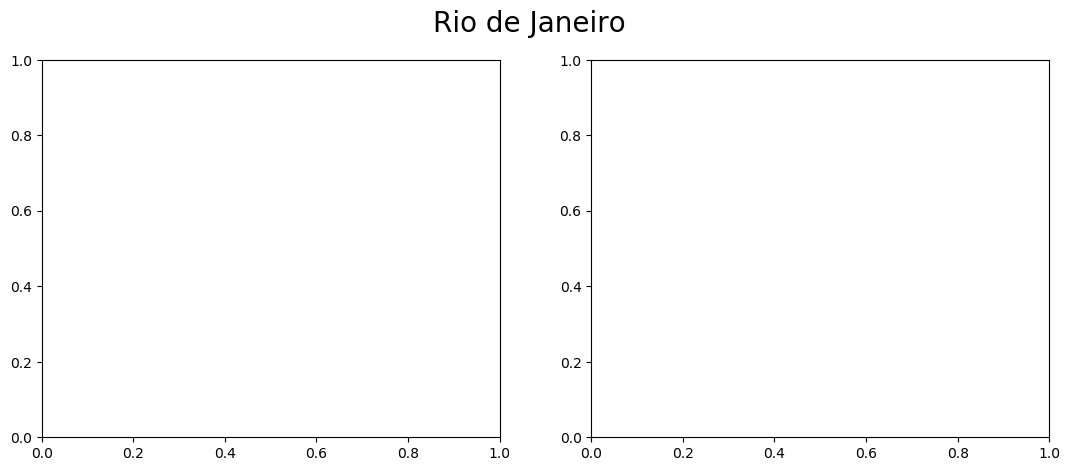

In [129]:
fig, ax = plt.subplots(1, 2, figsize=(13, 5), dpi=100)
fig.suptitle('Rio de Janeiro', fontsize=20)
#plot(corona_RJ.date, corona_RJ.cases, 'r', label='Casos')
ax[0,1].set_title("Casos no Estado do Rio de Janeiro até o dia 27/03")
#ax[0,1].grid(True)
ax[0,1].set_xlabel("Dias")
ax[0,1].set_ylabel("Números de casos")
ax[0,1].legend('Casos')

#### Teste

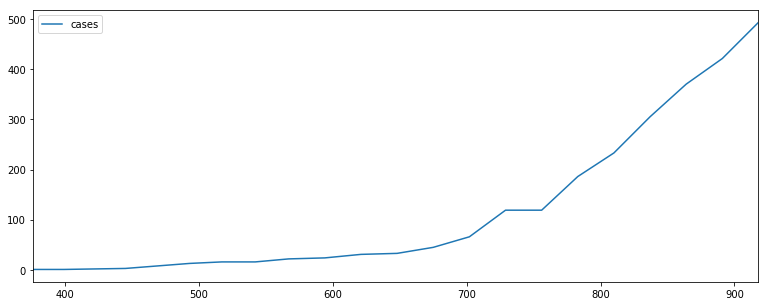

In [123]:
ax = corona_RJ.filter(items=['date', 'cases'])\
            .plot(figsize=(13, 5))

#fig, ax = plt.subplots(1, 2, figsize=(13, 5), dpi=100)
#plt.subtitle('Rio de Janeiro')
#ax[0,1].plot(corona_RJ.date, corona_RJ.cases, 'r', label='Casos')
#ax[0,1].set_title("Casos no Estado do Rio de Janeiro até o dia 27/03")
##ax[0,1].grid(True)
#ax[0,1].set_xlabel("Dias")
#ax[0,1].set_ylabel("Números de casos")
#ax[0,1].legend('Casos')

#### teste 2

AttributeError: 'NoneType' object has no attribute 'update'

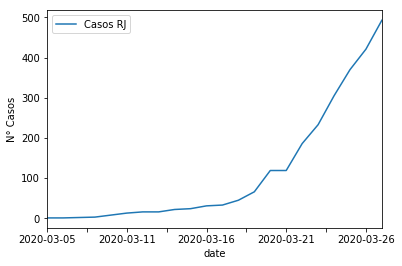

In [136]:
# Multi line plot
ax = corona_RJ.plot("date", "cases", kind="line", label = 'Casos RJ')
#corona_RJ.plot("date", "deaths", ax= ax , kind="line", label = 'Mortes RJ', title= 'Corona no RJ até dia 27/03') #ax : axes object

# Set axes
ax.set(ylabel='N° Casos', xlabel = 'Dias', xticks =corona_RJ["date"])

# morte pop total

   ### outras referencias
   [Notebook kaggle sobre o COVID (outro dataset)](https://www.kaggle.com/imdevskp/covid-19-analysis-visualization-comparisons)